## Avores de DEcisão: Classificação:

# Importações das bibliotecas:

In [51]:
# Pacotes de preparação de dados
import pandas as pd
import numpy as np

#Pacotes Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# PAcotes de Modelagem estatisticas
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score 

In [4]:
df = pd.read_csv('iris2.csv', sep=',')

In [7]:
df.Tipo_Orquidea.unique()

array([0, 1], dtype=int64)

In [9]:
df

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


# Preparação de Dados

## Caso tenha valores e campos vazio/null

In [19]:
df.isnull().sum()

comprimento_sepala    0
largura_sepala        0
comprimento_petala    0
largura_petala        0
Tipo_Orquidea         0
dtype: int64

In [21]:
df.duplicated().sum()

1

In [31]:
df.loc[df.duplicated()]

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,Tipo_Orquidea
142,5.8,2.7,5.1,1.9,0


In [33]:
df.loc[df.duplicated().sum()]

comprimento_sepala    4.9
largura_sepala        3.0
comprimento_petala    1.4
largura_petala        0.2
Tipo_Orquidea         0.0
Name: 1, dtype: float64

# Análise Exploratória

C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

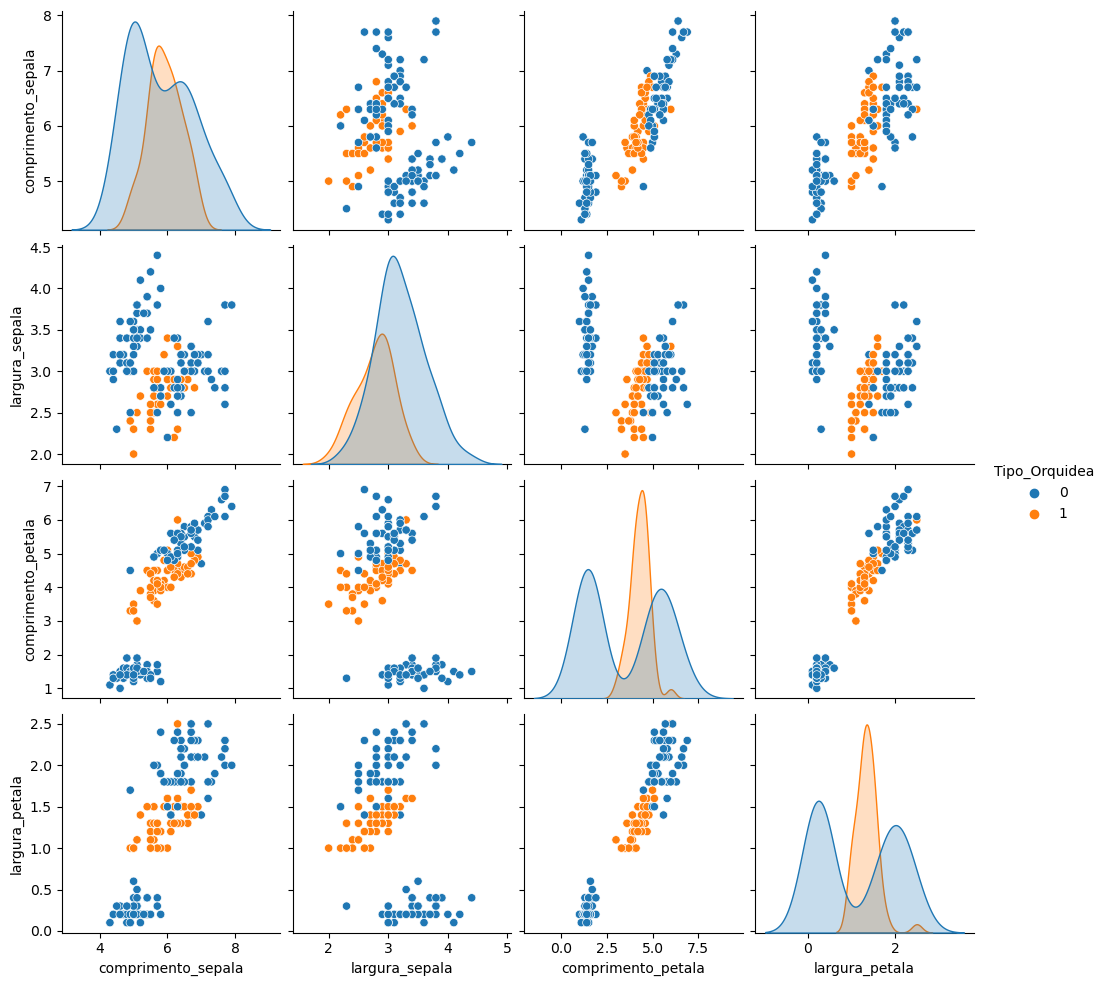

In [53]:
sns.pairplot(df, hue="Tipo_Orquidea")

## Modelo: Árvores de Decisão

In [62]:
# target (varial resposta)
y = df['Tipo_Orquidea']
# FEatures (varial Explicativa)
x = df.drop('Tipo_Orquidea', axis = 1)

In [64]:
x

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [68]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Name: Tipo_Orquidea, Length: 150, dtype: int64

In [112]:
modelo = DecisionTreeClassifier(max_depth=2, random_state=42)
modelo.fit(x,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Text(0.5, 1.0, 'Classificação de Flores')

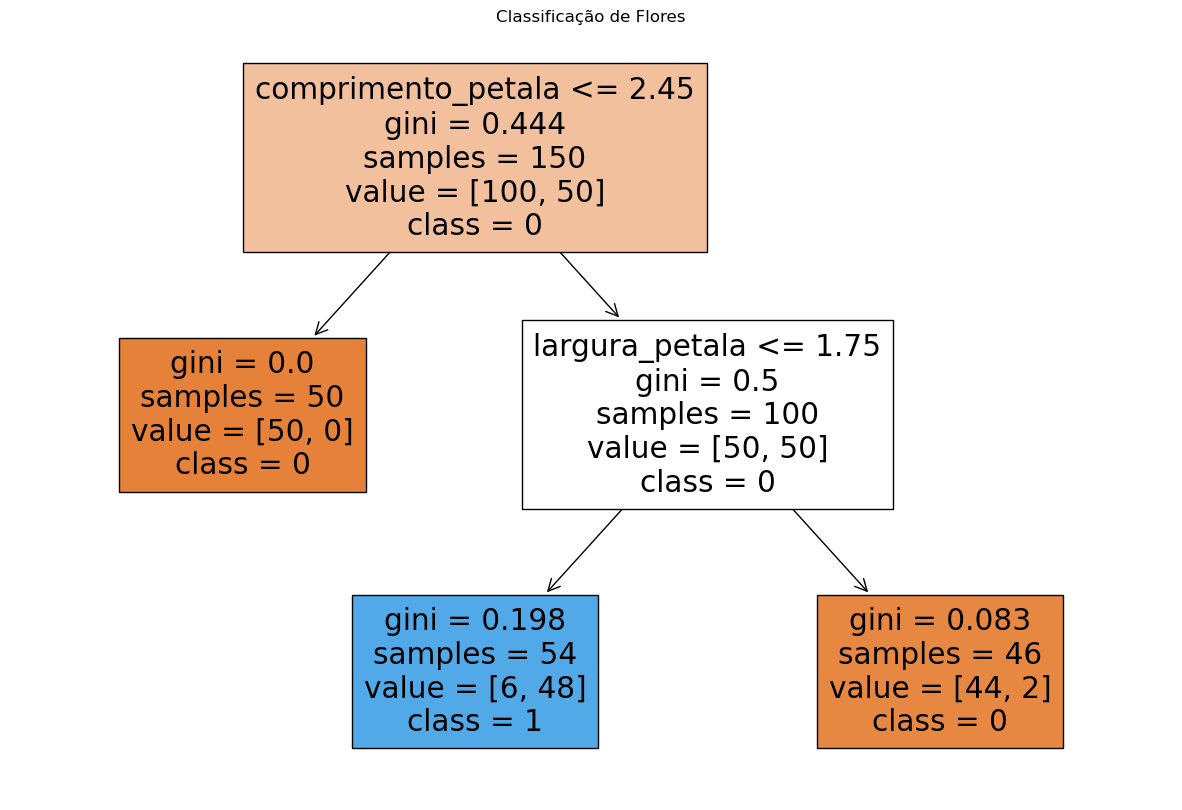

In [116]:
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo, feature_names = features,class_names = ['0', '1'], filled = True);
plt.title("Classificação de Flores")

## Desempenho do Modelo

In [129]:
round(accuracy_score(y, modelo.predict(x)), 2)

0.95